## **<center> Lecture 4 : Financial Basics and Time-Series Data </center>**

#### <u> Financial Time Series </u>

**Important for :**
- Forecasting
- Risk Management
- Decision Making

**Exercise 1, <span style="color:red"> 2 & 3** </span>

In [23]:
import numpy as np
import statistics as stat

def mise_en_forme(dates, stock_prices):
    for date, price in zip(dates, stock_prices): # parcours simultanément 2 listes en parallèle
    # Zip prends deux ou plusieurs listes et les "zip" ensemble
        print(f"{date} : ${price}")

def calculate_average(stock_prices):
    return sum(stock_prices) / len(stock_prices)

def days_above_av(dates, stock_prices):
    average = calculate_average(stock_prices)
    above_average_day = [date for date, price in zip(dates, stock_prices) if price > average]
    return above_average_day

def highest_price_day(dates, stock_prices):
    max_price = max(stock_prices)
    max_index = stock_prices.index(max_price) # Permet de trouver l'indice de la première occurence, ici le prix max définit juste avant
    return dates[max_index], max_price # Dates [max_index] permet d'aller récupérer la valeur associé à max_index dans date

def calculate_volatility(prices):
    return stat.stdev(stock_prices)

def trend_finder(dates, prices):
    # Un peu tordu, mais c'est la seule solution que j'ai trouvé : un compteur de journée en hausse et en baisse
    increases = 0
    decreases = 0
    for i in range(1, len(stock_prices)): # On commence à 1 car on a besoin d'une précédente itération pour la pertinence de l'analyse
        if stock_prices[i] > stock_prices[i-1]: # On utilise i et i-1 pour comparer d'un jours à l'autre
            increases += 1
        elif stock_prices[i] < stock_prices[i-1]:
            decreases +=1
    
    if increases > decreases:
        return "Bullish"
    elif decreases > increases:
        return "Bearish"
    else:
        return "Stable"
    
def m_irma(prices):
    total_change = 0
    for i in range(1, len(prices)):
        total_change += (prices[i] - prices[i-1])
    average_change = total_change / (len(prices) - 1)
    return prices[-1] + average_change

############################################################
dates = ["1 st January", "2nd January", "3rd January", "4th January", "5th January", "6th January"]
stock_prices = [150, 152, 151, 155, 156, 153]
############################################################

average_price = calculate_average(stock_prices)
day, max_price = highest_price_day(dates, stock_prices)
volatility = calculate_volatility(stock_prices)
trend = trend_finder(dates, stock_prices)
above_average_day = days_above_av(dates, stock_prices)
next_day_price = m_irma(stock_prices)

mise_en_forme(dates, stock_prices)
print(f"L'action est {trend}")
print(f"Average Stock Price : ${average_price:.2f}")
print(f"Above Average Price day : {above_average_day}")
print(f"Max Price : ${max_price:.2f} le {day}")
print(f"Volatilité : {volatility:.2f}")
print(f"Forecast for next day : {next_day_price:.2f}")

### A retenir ici ###
# - L'utilisation de .index pour récupérer l'index d'une valeur


1 st January : $150
2nd January : $152
3rd January : $151
4th January : $155
5th January : $156
6th January : $153
L'action est Bullish
Average Stock Price : $152.83
Above Average Price day : ['4th January', '5th January', '6th January']
Max Price : $156.00 le 5th January
Volatilité : 2.32
Forecast for next day : 153.60


#### <u> Time Value of Money </u>

**Exercice related to Present Value & Future Value**

In [1]:
def present_value(fv, r, n):
    return fv / (1+r)**n

FV = float(input("FV : "))
r = float(input("r :"))
n = float(input("n :"))

PV = present_value(FV, r, n)
print(f"The PV is : ${PV:.2f}")

The PV is : $445.00


In [ ]:
def future_value(pv, r, n):
    return pv*(1+r)**n

PV = float(input("PV : "))
r = float(input("r :"))
n = float(input("n :"))

FV = future_value(FV, r, n)
print(f"The FV is : ${FV:.2f}")

**Exercice related to Discounting & Compouding**

In [3]:
def compound(pv, r, n):
    return pv * (1 + (r/n))**n

pv = float(input("PV :"))
r = float(input("r :"))
n = float(input("n :"))

FV = compound(pv, r, n)
print(f"After {n:.0f} year with a {r * 100:.2f} %, you'll have : ${FV:.2f}")

After 1 year with a 8.00 %, you'll have : $124.20


#### <u> Working with Time Series Data using pandas </u>

[*********************100%%**********************]  1 of 1 completed


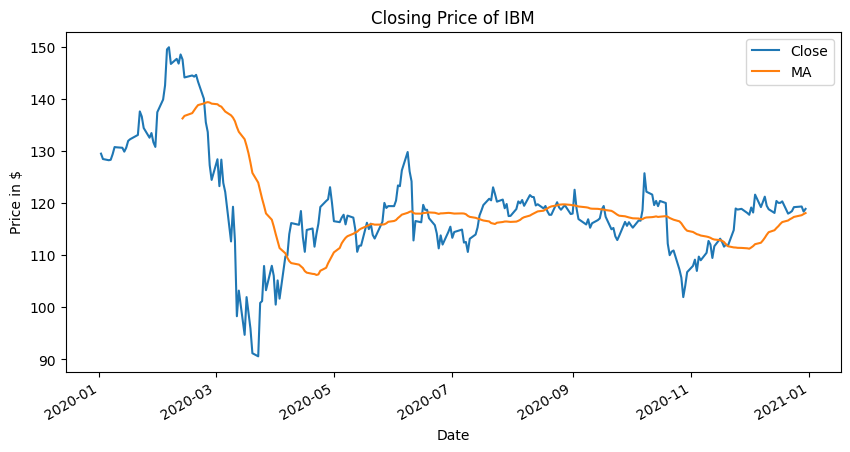

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close   
Date                                                                     
2020-01-02  129.063095  129.942642  128.843216  129.464630  107.512398  \
2020-01-03  127.695984  128.929260  127.686424  128.432129  106.654984   
2020-01-06  127.552582  128.336517  127.342255  128.202682  106.464447   
2020-01-07  127.810707  129.024857  127.533463  128.288712  106.535896   
2020-01-08  128.594650  129.885284  128.030594  129.359467  107.425079   
...                ...         ...         ...         ...         ...   
2020-12-23  118.432121  119.703636  118.298279  118.451241  103.525177   
2020-12-24  119.502869  119.598473  118.747612  119.206497  104.185272   
2020-12-28  119.598473  121.032501  118.986618  119.330788  104.293907   
2020-12-29  119.837479  119.961761  117.820267  118.355644  103.441643   
2020-12-30  118.355644  119.359467  118.193115  118.871895  103.892830   

       

In [22]:
import matplotlib.pyplot as plt
import yfinance as yf

ticker = input("Ticker : ")
start = input("Date de début (YYYY-MM-DD): ")
end = input("Date de fin (YYYY-MM-DD): ")
interval = input("Intervalle : 1d, 1wk, 1mo : ")
MA = int(input("Quel paramètre pour la MA ? :"))

stock_data = yf.download(ticker, start=start, end=end, interval=interval)
stock_data['MA'] = stock_data['Close'].rolling(window=MA).mean()

# data_quarterly = stock_data['Close'].resample('Q')

stock_data[['Close', 'MA']].plot(figsize=(10, 5))
plt.title(f'Closing Price of {ticker}')
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.show()

print(stock_data.head)